# Gradiente descendente

El siguiente código tiene como objetivo explicar los conceptos básicos que rigen el comportamiento de los métodos de optimización   basados en gradiente, aunque este no es usado directamente en las redes neuronales profundas es un elemento clave para comprender los métodos estocásticos. 


In [5]:
!pip install d2l
!pip install mxnet==1.6.0b20191122


## Gradiente descendente en una dimensión 

Lo que busca el gradiente descendente es encontrar un mínimo  o un máximo de la función, ya sea local o no. Este método se basa en el gradiente ya que este indica la dirección en donde se encuentra el objetivo gradiente negativo $- f'(x)$ para minimización y gradiente positivo para maximización $ f'(x)$

Este algoritmo función a partir de una mejora paulatina partiendo de un punto inicial  $x$, generalmente elegido aleatoriamente, y generar mejoras paulatinas de este agregando una variación denominada $\epsilon$ que se encuentra en función del gradiente $\epsilon = - f'(x)$. 

Esto implica que el nuevo valor se calcula a partir de modificar paulatinamente el valor de $x$ por medio de la siguiente fórmula.


$$x \leftarrow x - \eta f'(x)$$


In [0]:
%matplotlib inline
import numpy as np
import d2l

import math


Para probar este concepto se parte de una ecuación simple que se buscará optimizar $f(x)=x^2$ y $f'(x)=2x$


In [0]:
def f(x):     return x**2  # objective function
def gradf(x): return 2 * x # its derivative

Se usará como valor inicial  $x=10$  Y se asumirá un valor de eta $\eta=0.2$.Usando el método de gradiente descendente en   $x$  durante 10 veces el valor de $x$ se aproxima a la solución óptima.

In [19]:
def gd(eta,x):
    results = [x]
    for i in range(10):
        x -= eta * gradf(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2,10)

epoch 10, x: 0.06046617599999997


Gráficamente se puede puede ver el progreso de $x$ usando la siguiente función 

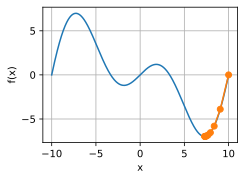

In [17]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)))
    f_line = np.arange(-n, n, 0.01)
    d2l.set_figsize((3.5, 2.5))
    d2l.plot([f_line, res], [[f(x) for x in f_line], [f(x) for x in res]], 
             'x', 'f(x)', fmts=['-', '-o'])

show_trace(res)

### Velocidad de aprendizaje (learning rate)


La velocidad de aprendizaje $\eta$ es seleccionada como un parámetro por el diseñador. Si la velocidad de aprendizaje es muy pequeña , Causará que $x$ se mejore muy lentamente llevando a muchísimas iteraciones para llegar a un resultado. Para ejemplificar esto se busca resolver el problema de optimización usando  $\eta = 0.05$ como se puede ver con 10 pasos aún nos encontramos muy lejos de la solución óptima.


epoch 10, x: 3.4867844009999995


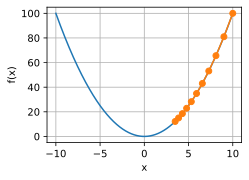

In [10]:
show_trace(gd(0.05,10))

En caso contrario si usamos un valor de velocidad de aprendizaje demasiado grande  no se puede garantizar que la solución mejore y es probable que la solución no converge. Como ejemplo si usamos un valor de velocidad de aprendizaje $\eta=1.1$, la solución oscila en el punto óptimo pero no converge. 

epoch 10, x: 61.917364224000096


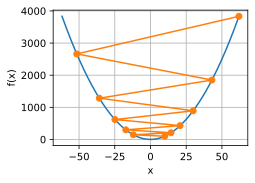

In [11]:
show_trace(gd(1.1,10))

###  Mínimos locales 

El método del gradiente funciona excelentemente en funciones convexas. Pero para ilustrar que pasa en una función no-convexa consideraremos el caso de  $f(x) = x \cdot \cos c x$. Esta función tiene una infinidad de mínimos locales,  dependiendo del valor de aprendizaje nos dirá que tan factible es llegar a  a una solución óptima o quedar atrapado  en un mínimo local. 


epoch 10, x: -0.10169487649682152


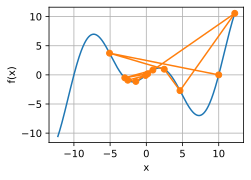

In [24]:
c = 0.15 * math.pi
def f(x):     return x*math.cos(c * x) 
def gradf(x): return math.cos(c * x) - c * x * math.sin(c * x)

show_trace(gd(3.2,10))

## Gradiente descendente multivariable 

Ya que se ha considerado el caso de una sola dimensión es fácil generalizar el algoritmo para múltiples dimensiones   considerando que el gradiente correspondiente es también es multivariable considerando derivadas parciales. 

$$\nabla f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$$

Cada elemento de la derivada parcial  $\partial f(\mathbf{x})/\partial x_i$ en el gradiente indica el cambio $f$ at $\mathbf{x}$ con respecto a la entrada  $x_i$.

En otras palabras se puede generalizar la función de ajuste del gradiente para cualquier número de variables.

$\mathbf{x_i} \leftarrow \mathbf{x_i} - \eta \nabla f(\mathbf{x_i}).$

Para ver esto en la práctica se propone la siguiente función elíptica $f(\mathbf{x})=x_1^2+2x_2^2$ con una entrada de dos dimensiones  $\mathbf{x} = [x_1, x_2]^\top$ y un escalar como salida. El gradiente se encuentra dado por $\nabla f(\mathbf{x}) = [2x_1, 4x_2]^\top$. Se observa la trayectoria  $\mathbf{x}$ durante el gradiente descendente desde el punto inicial $[-5,-2]$. 


In [0]:
# Save to the d2l package.
def train_2d(trainer):
    """Optimize a 2-dim objective function with a customized trainer."""
    # s1 and s2 are internal state variables and will 
    # be used later in the chapter
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

# Save to the d2l package.
def show_trace_2d(f, results):
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize((3.5, 2.5))
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1 -0.057646, x2 -0.000073


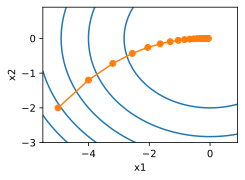

In [0]:
def f(x1, x2): return x1 ** 2 + 2 * x2 ** 2   # objective
def gradf(x1, x2): return (2 * x1, 4 * x2)    # gradient 
def gd(x1, x2, s1, s2): 
    (g1, g2) = gradf(x1, x2)                  # compute gradient
    return (x1 -eta * g1, x2 -eta * g2, 0, 0) # update variables

eta = 0.1
show_trace_2d(f, train_2d(gd))